Rotação de um Qubit no Círculo de Bloch:


Conceito Demonstrado: Manipulação de estado de um qubit, portas de rotação.
Descrição: Inicializar um qubit no estado $|0\rangle$, aplicar uma porta de rotação (por exemplo, qml.RY(angle, wires=0)) com um ângulo específico (e.g., np.pi/2) e medir o estado resultante. Pode-se variar o ângulo para mostrar como o estado se move no círculo de Bloch.
Código Esperado (visão geral):



In [1]:
try:
    import pennylane as qml
    from pennylane import numpy as np
    print("PennyLane já está instalado.")
except ImportError:
    print("PennyLane não está instalado. Iniciando a instalação...")
    !pip install pennylane
    from pennylane import numpy as np
    import pennylane as qml
    print("PennyLane instalado com sucesso.")

import matplotlib.pyplot as plt
from collections import Counter


PennyLane não está instalado. Iniciando a instalação...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 110.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 135.6 MB/s eta 0:00:00
PennyLane instalado com sucesso.


/usr/local/lib/python3.12/dist-packages/pennylane/__init__.py:209: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.6.2. You have version 0.7.2 installed. Please downgrade JAX to 0.6.2 to avoid runtime errors using python -m pip install jax~=0.6.0 jaxlib~=0.6.0
  warnings.warn(


angle_val = 1.5707963267948966 exp_val = 0.02


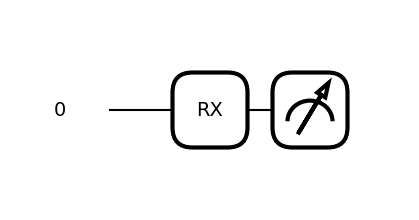

In [2]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev,shots=100)
def rotation_circuit(angle):
    qml.RX(angle, wires=0)
    return qml.expval(qml.PauliZ(0)) # Valor esperado para mostrar a rotação

qml.draw_mpl(rotation_circuit)(np.pi/2)

angle_val = np.pi / 2
exp_val = rotation_circuit(angle_val)

# Demonstrar como o valor esperado muda com o ângulo
print('angle_val =',angle_val , 'exp_val =',exp_val)


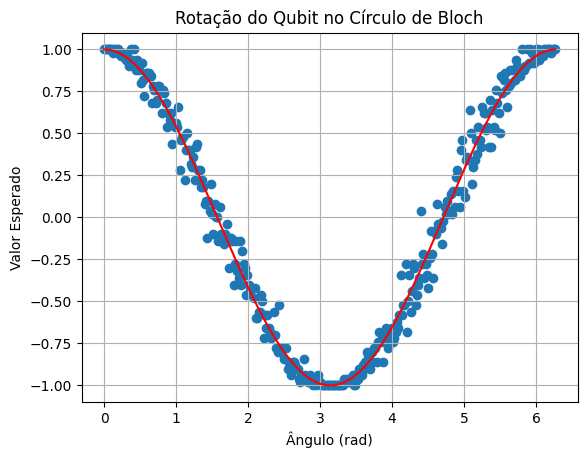

In [3]:
angle_val = []
exp_val = []

for i in range(360):
  angle_val_i = i*2*np.pi/360
  exp_val_i = rotation_circuit(angle_val_i)
  angle_val.append(angle_val_i)
  exp_val.append(exp_val_i)
angle_val = np.asarray(angle_val)
exp_val = np.asarray(exp_val)


exp_val_t = np.cos(angle_val)

plt.scatter(angle_val, exp_val)
plt.plot(angle_val, exp_val_t, 'r-')
plt.xlabel('Ângulo (rad)')
plt.ylabel('Valor Esperado')
plt.title('Rotação do Qubit no Círculo de Bloch')
plt.grid(True)
plt.show()

Exercício 1. Calcular o valor esperado teórico da saída do circuito.

Observação: Note que o operador rotação em torno do eixo x é definido por,
$
R_{x}({\alpha}) = \frac{1}{\sqrt{2}}
\begin{bmatrix}
\cos(\alpha/2) & -i \sin(\alpha/2) \\
-i \sin(\alpha/2) & \cos(\alpha/2)
\end{bmatrix}
$

que $|\psi_0 \rangle =  |0\rangle$, que o valor esperado é $\langle\psi_{final}|Z|\psi_{final} \rangle$ onde

$
Z =
\begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}
$

Exercício 2. Modifique o código acima para que o estado inicial seja o estado $|1\rangle$ e compare os resultados.

Desafio: Modifique o código acima para que o estado inicial seja o estado inicial seja uma superposição $\frac{1}{2}(|0\rangle + |1\rangle)$ e compare os resultados.